<h1 style="color:rgb(0,120,170)">Machine Learning: Unsupervised Techniques</h1>
<h1 style="color:rgb(0,120,170)">Maximum Likelihood</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Task 1: Formula for Maximum Likelihood of Poisson Distribution</h2>

Compute the Maximum Likelihood Estimator for the parameter $\lambda > 0$ of a
Poisson distribution. This means: Assuming we have data samples ${x_{1},x_{2},...,x_{n}}$, we want to
find the $\lambda$ that maximizes the likelihood

$$
\mathcal{L}(\lambda) = \prod_{i=1}^{n} \mathcal{P}(x_{i}; \lambda) = \prod_{i=1}^{n} \frac{\lambda^{x_{i}}}{x_{i}!} \mathcal{e}^{-\lambda}
$$


**Hint:** You will have a much easier time if you compute with the log-likelihood as compared to the likelihood.

You should arrive at this solution: $\hat{\lambda} = \frac{\sum_{i=1}^{n} x_{i}}{{n}}$.

<h3 style="color:rgb(210,90,80)">Calculation (25 points):</h3>

Your calculation here.

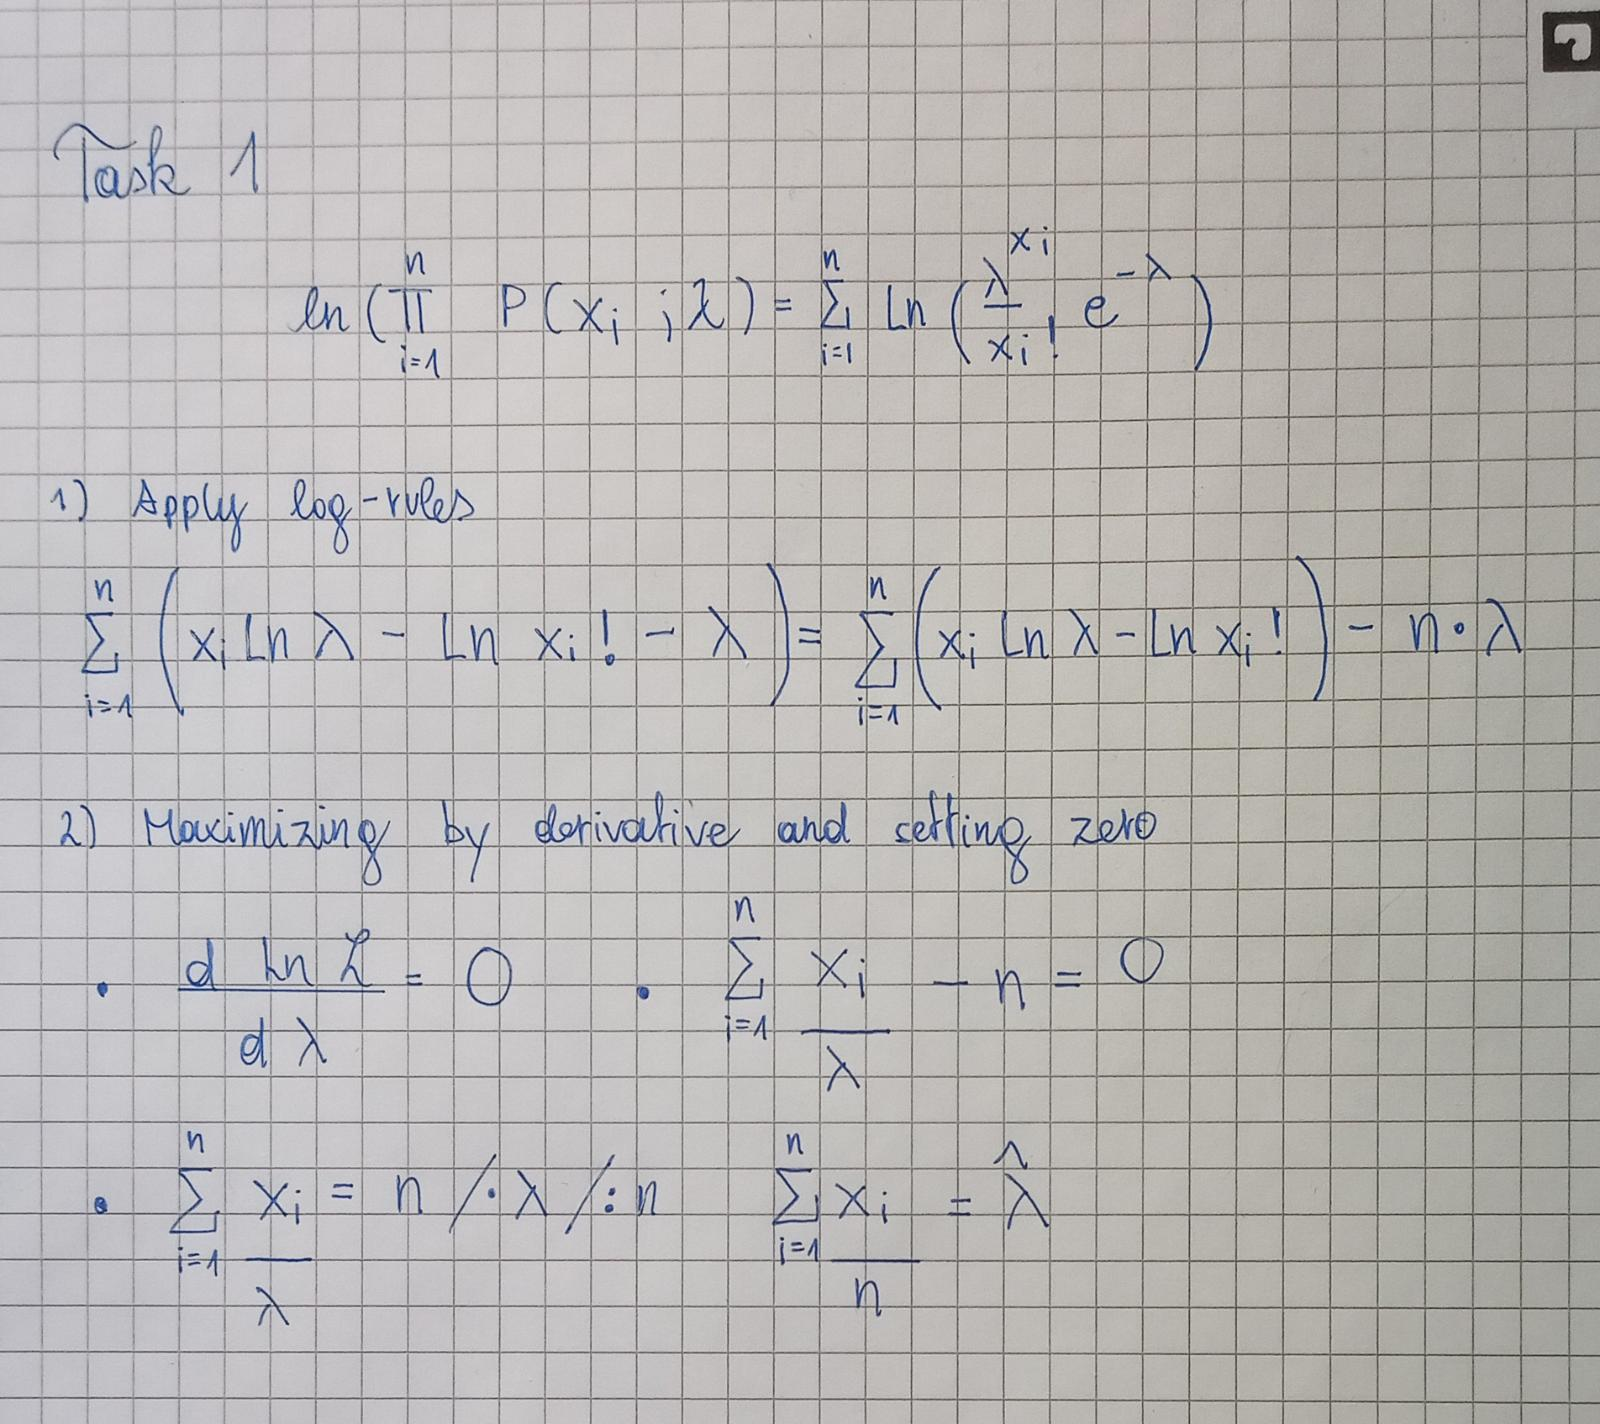

<h2 style="color:rgb(0,120,170)">Task 2: Implementation</h2>

Plot the log-likelihood from the previous task as a function of $\lambda$ and mark the
position where the maximum occurs. Use the data stored in poisson.csv for this task. As
possible values for $\lambda$ we suggest values from $1$ to $50$ with a step size of $0.5$, i.e. $(1.0, 1.5, 2.0, ...).$ 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_df = pd.read_csv('poisson.csv',header=None)

# print the head of the dataset, good practice
data_df.head()

,0
0,11
1,10
2,11
3,9
4,12


In [2]:
X = data_df.values

print(type(data_df))
print(type(X))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


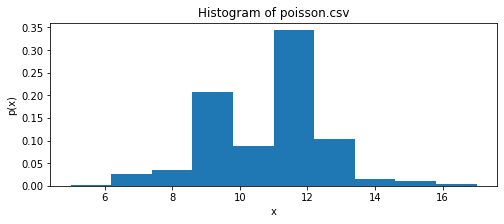

In [18]:
plt.figure(figsize=(8,3))
f = plt.hist(data_df,density=True)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Histogram of poisson.csv');
plt.show()

**Log Likelihood:**

In [36]:
import math

def loglikelihood(x, lam):
    if lam == 0:
        return -1
    lnL = 0 
    for xi in x:
        lnL += xi*np.log(lam)-np.log(math.factorial(xi))-lam
    return lnL

In [37]:
#test the function
lam_set = np.linspace(1,50,99)

print("lnL(1)  = %9.2f"%loglikelihood(X,lam_set[0]))
print("lnL(10) = %9.2f"%loglikelihood(X,lam_set[9*2]))
print("lnL(20) = %9.2f"%loglikelihood(X,lam_set[19*2]))
print("lnL(30) = %9.2f"%loglikelihood(X,lam_set[29*2]))
print("lnL(40) = %9.2f"%loglikelihood(X,lam_set[39*2]))
print("lnL(50) = %9.2f"%loglikelihood(X,lam_set[49*2]))

lnL(1)  = -17657.38
lnL(10) =  -2256.88
lnL(20) =  -4911.60
lnL(30) = -10614.89
lnL(40) = -17566.32
lnL(50) = -25201.67


<h3 style="color:rgb(0,120,170)">Task:</h3>

* Implement the estimator_formula function returning the analytic solution for lambda-hat

<h3 style="color:rgb(210,90,80)">Code (5 points):</h3>

In [38]:
def estimator_formula(X):
    """ the estimator returns lambda-hat according to the result of the calculation in task 1"""
    
    ##############################
    # Begin your code
    lam_max_formula = np.sum(X) / len(X)
    # End your code
    ##############################
    
    return lam_max_formula

In [39]:
lam_max_formula = estimator_formula(X)
print('Likelihood is maximal at lambda-hat (formula) = %9.3f'%lam_max_formula)
print('            Log-Likelihood at this lambda-hat = %9.3f'%loglikelihood(X,lam_max_formula))

Likelihood is maximal at lambda-hat (formula) =    10.597
            Log-Likelihood at this lambda-hat = -2239.405


<h3 style="color:rgb(0,120,170)">Task:</h3>

* Implement the estimator_data function returning an estimate for lambda-hat numerically using argmax over the suggested support points of lambda

<h3 style="color:rgb(210,90,80)">Code (5 points):</h3>

In [42]:
def estimator_support(X, lam_set):
    loglikelih = [loglikelihood(X,lami) for lami in lam_set]
    ##############################
    # Begin your code
    max_idx = (np.argmax(np.array(loglikelih)))
    lam_max = (lam_set[max_idx])
    # End your code
    ##############################

    ln_min = np.min(loglikelih)
    ln_max = np.max(loglikelih)
    
    return loglikelih, ln_min, ln_max, lam_max

In [43]:
loglikelih, ln_min, ln_max, lam_max = estimator_support(X, lam_set)
print('Likelihood is maximal at lambda-hat (argmax) = %9.3f'%lam_max)
print('           Log-Likelihood at this lambda-hat = %9.3f'%loglikelihood(X,lam_max))

Likelihood is maximal at lambda-hat (argmax) =    10.500
           Log-Likelihood at this lambda-hat = -2239.852


<h3 style="color:rgb(0,120,170)">Task:</h3>

* Plot the loglikelih function over lam_set
* Mark the maxima in the plot according to estimator_formula and estimator_support

<h3 style="color:rgb(210,90,80)">Code (10 points):</h3>

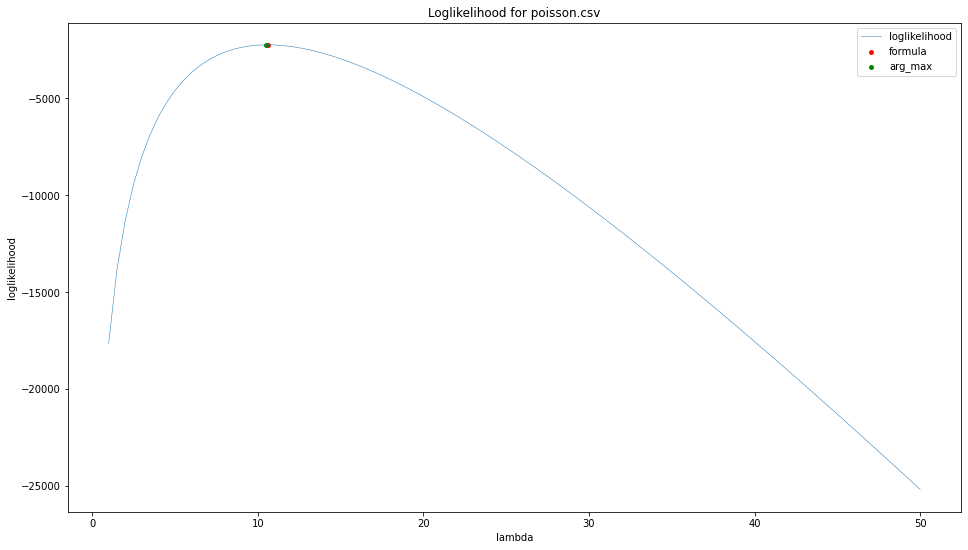

In [45]:
##############################
# Begin your code
plt.figure(figsize=(16, 9))
plt.plot(lam_set, loglikelih, linewidth=.5)

plt.scatter(estimator_formula(X), loglikelihood(X, estimator_formula(X)), s=15, color='red')
plt.scatter(lam_max, estimator_support(X, [lam_max])[1], s=15, color='green')
plt.legend(['loglikelihood', 'formula', 'arg_max'])
plt.xlabel('lambda')
plt.ylabel('loglikelihood')
plt.title('Loglikelihood for poisson.csv')
plt.show()


# End your code
##############################

<h3 style="color:rgb(0,120,170)">Task:</h3>

* Explain and discuss the result in your own words. Where is the maximum?

<h3 style="color:rgb(208,90,80)">Question (5 points)</h3>

Your answer here (two sentences).

- The maximum is at 10.597, because the estimate_formula is the analytical correct solution and it yields a higher estimation than the estimate_support